# Optimisation for Machine Learning

September 20, 2023

### Logistic
Contact: [Clement Royer](mailto:clement.royer@lamsade.dauphine.fr)
Lecture's web: [URL](https://www.lamsade.dauphine.fr/%7Ecroyer/teachOAA.html)
Examen: 60% (2h), dated December 13, 2023 10:00 AM - 12:00 PM
Project: 40%, during from October 6, 2023 to December 23, 2023

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

#### What is optimisation?
- Field of study that is concerned with finding the best decision (or decisions) from a set of available alternatives. In the simplest case, this is the problem of finding a maximum (or minimum) of a real function $f(x)$ of a real variable $x$.
- As a subfield of theoritical computer science/computational mathematics, matured between 1980s - 2000s with efficient software packages.
- Shift in the past decades (2000s - 2020s) data-driven optimisation, with the rise of machine learning and big data, lead to specific optimisation problems/formulations, changes the preferred classes of algorithms. Old algorithms became trendy again. Other algorithms are irrelevant (e.g. Newton's method).

#### Typical optimisation ML:
Start with data $D = \{(x_i, y_i)\}_{i=1}^n$ and a model $h(x, \theta)$, where $\theta$ is the parameter to be optimised. The goal is to discover a mapping between the input $x_i$ and the output $y_i$. $h$ such that $h(x_i, \theta) \approx y_i$ for all $i$.

#### Process: Training/Learning
Typically $h$ is defined/parameterized with a vector $\theta \in R^d$ and learning consists in finding the best $\theta$ such that $h(x_i, w) \approx y_i$ for all $i$.

An optimisation problem asscoiated with this task will have following form:
$$
\min_{\theta \in R^d} f_D(\theta) + \lambda R(\theta)
$$
where $f_D(\theta)$ is the loss function, $R(\theta)$ is the regularisation term and $\lambda$ is the regularisation parameter.

#### Notation:
- $w = \begin{bmatrix} w_1 \\ \vdots \\ w_d \end{bmatrix} \in R^d$ is the vector of parameters to be optimised.
- $f_D(w)$ is the loss function, training/empirical risk, defined as the average loss over the training data:
$$
f_D(w) = \frac{1}{n} \sum_{i=1}^n l(h(x_i, w), y_i)
$$
where $l$ is the loss function, $h$ is the model and $y_i$ is the target value for the $i$-th training example.
- $R(w)$ is the regularisation term, which is a function of the parameters $w$. Does not depend on the training data. It uses to promote some properties of the solution (e.g. sparsity, smoothness, etc.).
- $\lambda > 0$ is the regularisation parameter, which controls the trade-off between the training error and the regularisation term.

Objective function: $f(w) = f_D(w) + \lambda R(w)$ is the function to be minimised.
Optimal solution: $w^* = \arg \min_{w \in R^d} f(w)$ is the vector of parameters that minimises the objective function.
Optimal value: $f^* = f(w^*)$ is the value of the objective function at the optimal solution.

The structure of $f_D$ and its dependency on $D$ are the reasons why some algorithms are more suitable to solve than others.

#### Example: 

##### Linear Least Squares (LLS) problem:
Data $D = \{(x_i, y_i)\}_{i=1}^n$ and $x_i \in R^d$ and $y_i \in R$ for all $i$.
$\mathbf{X} = \begin{bmatrix} x_1^T \\ \vdots \\ x_n^T \end{bmatrix} \in R^{n \times d}$ and $y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix} \in R^n$.

Goal: Find the best linear model $h(x, w) = x^T w$ such that $h(x_i, w) \approx y_i$ for all $i$.

There may not exist $w$ such that $h(x_i, w) = y_i$ for all $i$ (overdetermined system). We want to find the best $w$ such that $h(x_i, w) \approx y_i$ for all $i$.

The LLS problem is defined as:
$$
\min_{w \in R^d} \frac{1}{2} \| \mathbf{X} w - y \|_2^2 = \frac{1}{2} \sum_{i=1}^n (x_i^T w - y_i)^2 = \frac{1}{2} \sum_{i=1}^n l(h(x_i, w), y_i)
$$
where $\| \cdot \|_2$ is the Euclidean norm, $\| v \|_2 = \sqrt{v^T v}$ for all $v \in R^d$.

- For all $v \in R^d$, $\| v \|_2^2 = \sqrt{\sum_{i=1}^d v_i^2}$.

##### Ridge regression
$$
\min_{w \in R^d} \frac{1}{2} \| \mathbf{X} w - y \|_2^2 + \frac{\lambda}{2} \| w \|_2^2
$$
where $\lambda > 0$ is the regularisation parameter.

##### Lasso regression
$$
\min_{w \in R^d} \frac{1}{2} \| \mathbf{X} w - y \|_2^2 + \lambda \| w \|_1
$$
where $\lambda > 0$ is the regularisation parameter.

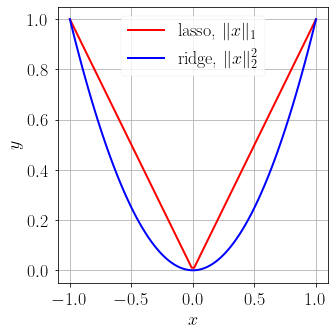

In [14]:
# Visualisation ridge and lasso norms
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
x = np.linspace(-1, 1, 100)
ax.plot(x, np.abs(x), label=r'lasso, $\| x \|_1$', linewidth=2, color='red')
ax.plot(x, x**2, label=r'ridge, $\| x \|_2^2$', linewidth=2, color='blue')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

##### Support Vector Machine (SVM)
Given data $D = \{(x_i, y_i)\}_{i=1}^n$ and $x_i \in R^d$ and $y_i \in \{-1, 1\}$ for all $i$. Find mapping that classify the $x_i$ into two classes.

The SVM problem is defined as:
$$
\min_{w \in R^d} \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i x_i^T w) + \frac{\lambda}{2} \| w \|_2^2
$$
where $\lambda > 0$ is the regularisation parameter.
Quantify $x_i^T w > 1$ and $x_i^T w < -1$, then the loss is 0. If $x_i^T w \in [-1, 1]$, then the loss is $1 - y_i x_i^T w$.
Recall hyperplane $H = \{ x \in R^d : w^T x + b = 0 \}$, where $w \in R^d$ is the normal vector to the hyperplane and $b \in R$ is the bias term.

##### Deep Neural Network 
Feedforward neural architecture, multi-class classification.
Data $D = \{(x_i, y_i)\}_{i=1}^n$ and $x_i \in R^{d_0}$ and $y_i = [y_{ij}]_j \in R^{C}$ for all $i$ and $j$.
One hot encoding: $y_{ij} = 1$ if $y_i = j$ and $y_{ij} = 0$ otherwise.

Neural network architecture with $L$ layers:
$$
x^0 \in R^{d_0} \Rightarrow x^1 \in R^{d_1} \Rightarrow \cdots \Rightarrow x^L \in R^{d_L}
$$
where $x^l$ is the output of the $l$-th layer and $d_l$ is the dimension of the $l$-th layer for all $l \in \{0, \ldots, L\}$.
For all $l \in \{1, \ldots, L\}$, $x^l = \sigma^l(W^l x^{l-1} + b^l)$, where $W^l \in R^{d_l \times d_{l-1}}$ is the weight matrix, $b^l \in R^{d_l}$ is the bias vector and $\sigma^l$ is the activation function.

The DNN problem is defined as:
Takes $x_i \in R^{d_0}$ and outputs $x^L \in R^{d_L}$.
Parameters: $W^l \in R^{d_l \times d_{l-1}}$ and $b^l \in R^{d_l}$ for all $l \in \{1, \ldots, L\}$, we can stack them into a vector $w \in R^d$ where: $$d = \sum_{l=1}^L d_l d_{l-1} + \sum_{l=1}^L d_l$ = $d_0 d_1 + d_1 + d_1 d_2 + d_2 + \cdots + d_{L-1} d_L + d_L$.$$

$L$ can be very large, $d$ visually large too

The DNN problem is defined as:
$$
\min_{W^1, \ldots, W^L} \frac{1}{n} \sum_{i=1}^n \left( \log\left(\sum_{j=1}^C \exp\left({[x^L_{i}]_j}\right)\right) - \sum_{j=1}^C y_{ij} [x^L_{i}]_j \right) + \frac{\lambda}{2} \| W \|_F^2
$$
where $\lambda > 0$ is the regularisation parameter and $\| \cdot \|_F$ is the Frobenius norm, $\| A \|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n A_{ij}^2}$ for all $A \in R^{m \times n}$.

## Basic of continuous optimisation

An optimisation problem:
$$
\min_{w \in R^d} f(x) \quad \text{subject to} \quad w \in \mathcal{X}
$$
where $f: R^d \rightarrow R$ is the objective function and $\mathcal{X} \subseteq R^d$ is the feasible set.

More generally, we can consider the problem:
$$
\min_{w \in R^d} f(x) \quad \text{subject to} \quad g_i(w) \leq 0 \quad \text{for all} \quad i \in \{1, \ldots, m\}
$$
where $g_i: R^d \rightarrow R$ is the $i$-th constraint function for all $i \in \{1, \ldots, m\}$.

We focus on unconstrained optimisation problems, so there are no constraints, i.e. $\mathcal{X} = R^d$.

Solution set of the problem: $S = \{ w \in R^d : f(w) = f^* \}$, where $f^* = \arg \min_{w \in R^d} f(w)$ is the optimal value of the problem. This set may be empty, finite, infinite or unbounded.

For all $\lambda > 0$
$$
\arg \min_{w \in R^d} f(w) = \arg \min_{w \in R^d} \lambda f(w) \\
\min \lambda f(w) = \lambda \min f(w)
$$

Two problems are equivalent, if the solution of one can be readily obtained from the solution of the other.

##### Remark: In general, it is hard (computationally hard/intractable) to solve an optimisation problem directly, need to simplify by function composition. In practice, we exploit other properties of the problem to build algorithms that can find approximate solutions.

Definition:
- $\overline w \in \arg \min_{w \in R^d} f(w)$ is a global minimiser of $f$ if $f(\overline w) \leq f(w)$ for all $w \in R^d$.
- $\overline w \in \arg \min_{w \in R^d} f(w)$ is a local minimiser of $f$ if there exists $\epsilon > 0$ such that $f(\overline w) \leq f(w)$ for all $w \in R^d$ such that $\| w - \overline w \|_2 \leq \epsilon$.
##### In some data science task, possible to quantify how far local minima are from global minima.

The notions of convexity and differentiability allow to characterise the local minima (or approximations) in finite time or in easy way.

### Differentiability

For $f: R^d \rightarrow R$ is $\mathcal{C}^1$ (continuously differentiable) if its derivative exists with all $w \in R^d$ and is continuous.

$$
\Rightarrow \nabla f(w) = \begin{bmatrix} \frac{\partial f(w)}{\partial w_1} \\ \vdots \\ \frac{\partial f(w)}{\partial w_d} \end{bmatrix} \in R^d
$$
such that for all $v \in R^d$, $f(v) \approx f(w) + \nabla f(w)^T (v - w)$ when $v$ is close to $w$, means that norm of $v - w$ is small.

#### Theorem: First-order necessary condition for optimality
Let $f: R^d \rightarrow R$ be $\mathcal{C}^1$ and let $\overline w \in R^d$ be a local minimiser of $f$.
$$
\Rightarrow \nabla f(\overline w) = 0_{R^d}
$$
where $0_{R^d} = \begin{bmatrix} 0 \\ \vdots \\ 0 \end{bmatrix} \in R^d$ is the zero vector.

Necessary condition because converse is actually false, i.e. $\nabla f(\overline w) = 0_{R^d}$ does not imply that $\overline w$ is a local minimiser of $f$.

In fact, $\overline w$ is a local minimiser of $f$ if and only if $\nabla f(\overline w) = 0_{R^d}$ and $\nabla^2 f(\overline w) \succeq 0$.

Saddle point: Local minima in some direction and local maxima in other direction.

### Convexity

A function $f: R^d \rightarrow R$ is convex if for all $w, v \in R^d$ and for all $\alpha \in [0, 1]$, we have:
$$
f(\alpha w + (1 - \alpha) v) \leq \alpha f(w) + (1 - \alpha) f(v)
$$
Convex function is a function that is always below its tangent lines.

#### Theorem:
Let $f: R^d \rightarrow R$ be the convex function, then:
- Any local minimiser of $f$ is a global minimiser of $f$.
- If $f \in \mathcal{C}^1$ and for all $\overline w \in R^d$ then $\overline w$ is a global minimiser of $f$ if and only if $\nabla f(\overline w) = 0_{R^d}$. This is necessary and sufficient condition for global minimiser.

$\mathcal{C}^1$ convex function are very easy to optimise, because we can find the global minimiser by solving a system of linear equations. Need to find $\overline w$ such that $\nabla f(\overline w) = 0_{R^d}$.